In [1]:
import pandas as pd
import numpy as np

In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("all", {}, "images.json", "images/")

In [3]:
from detectron2.data.datasets import load_coco_json

In [4]:
import pycocotools

In [5]:
from pycocotools import coco

In [6]:
import cv2

In [7]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [8]:
aaatest = MetadataCatalog.get("all")

In [10]:
dataset_dicts = DatasetCatalog.get("all")

In [11]:
import matplotlib.pyplot as plt

In [13]:
# import some common detectron2 utilities
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("all",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = (
    5000
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    64
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[01/07 10:07:06 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[01/07 10:07:06 d2.data.datasets.coco]: Loaded 522 images in COCO format from images.json
[01/07 10:07:06 d2.data.build]: Removed 0 images with no usable annotations. 522 images left.
[01/07 10:07:06 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   pupil    | 522          |
|            |              |
[01/07 10:07:06 d2.data.common]: Serializing 522 elements to byte tensors and concatenating them all ...
[01/07 10:07:06 d2.data.common]: Serialized dataset takes 0.21 MiB
[01/07 10:07:06 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[01/07 10:07:06 d2.data.build]: Using training sampler TrainingSampler


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[01/07 10:07:30 d2.engine.train_loop]: Starting training from iteration 0


/home/finch/.local/lib/python3.6/site-packages/detectron2/structures/masks.py:331: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/finch/.local/lib/python3.6/site-packages/detectron2/structures/masks.py:331: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/finch/.local/lib/python3.6/site-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/

[01/07 10:07:45 d2.utils.events]:  eta: 1:03:49  iter: 19  total_loss: 2.305  loss_cls: 0.649  loss_box_reg: 0.906  loss_mask: 0.687  loss_rpn_cls: 0.051  loss_rpn_loc: 0.006  time: 0.7625  data_time: 0.0128  lr: 0.000020  max_mem: 1860M
[01/07 10:08:00 d2.utils.events]:  eta: 1:04:10  iter: 39  total_loss: 2.071  loss_cls: 0.533  loss_box_reg: 0.892  loss_mask: 0.657  loss_rpn_cls: 0.025  loss_rpn_loc: 0.005  time: 0.7613  data_time: 0.0037  lr: 0.000040  max_mem: 1860M
[01/07 10:08:15 d2.utils.events]:  eta: 1:03:19  iter: 59  total_loss: 1.999  loss_cls: 0.454  loss_box_reg: 0.940  loss_mask: 0.576  loss_rpn_cls: 0.020  loss_rpn_loc: 0.004  time: 0.7587  data_time: 0.0039  lr: 0.000060  max_mem: 1860M
[01/07 10:08:30 d2.utils.events]:  eta: 1:02:07  iter: 79  total_loss: 1.829  loss_cls: 0.373  loss_box_reg: 0.931  loss_mask: 0.516  loss_rpn_cls: 0.019  loss_rpn_loc: 0.008  time: 0.7538  data_time: 0.0036  lr: 0.000080  max_mem: 1860M
[01/07 10:08:45 d2.utils.events]:  eta: 1:01:39 

[01/07 10:16:16 d2.utils.events]:  eta: 0:53:39  iter: 699  total_loss: 0.829  loss_cls: 0.076  loss_box_reg: 0.462  loss_mask: 0.247  loss_rpn_cls: 0.000  loss_rpn_loc: 0.004  time: 0.7497  data_time: 0.0036  lr: 0.000699  max_mem: 1860M
[01/07 10:16:31 d2.utils.events]:  eta: 0:53:26  iter: 719  total_loss: 0.652  loss_cls: 0.062  loss_box_reg: 0.399  loss_mask: 0.211  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7502  data_time: 0.0037  lr: 0.000719  max_mem: 1860M
[01/07 10:16:47 d2.utils.events]:  eta: 0:53:15  iter: 739  total_loss: 0.841  loss_cls: 0.079  loss_box_reg: 0.512  loss_mask: 0.212  loss_rpn_cls: 0.000  loss_rpn_loc: 0.004  time: 0.7509  data_time: 0.0034  lr: 0.000739  max_mem: 1860M
[01/07 10:17:02 d2.utils.events]:  eta: 0:53:01  iter: 759  total_loss: 0.691  loss_cls: 0.076  loss_box_reg: 0.443  loss_mask: 0.221  loss_rpn_cls: 0.000  loss_rpn_loc: 0.005  time: 0.7512  data_time: 0.0037  lr: 0.000759  max_mem: 1860M
[01/07 10:17:17 d2.utils.events]:  eta: 0:52

[01/07 10:24:37 d2.utils.events]:  eta: 0:45:36  iter: 1359  total_loss: 0.638  loss_cls: 0.068  loss_box_reg: 0.369  loss_mask: 0.191  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7528  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 10:24:52 d2.utils.events]:  eta: 0:45:22  iter: 1379  total_loss: 0.696  loss_cls: 0.058  loss_box_reg: 0.426  loss_mask: 0.206  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7528  data_time: 0.0035  lr: 0.001000  max_mem: 1860M
[01/07 10:25:07 d2.utils.events]:  eta: 0:45:06  iter: 1399  total_loss: 0.624  loss_cls: 0.057  loss_box_reg: 0.365  loss_mask: 0.194  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7526  data_time: 0.0038  lr: 0.001000  max_mem: 1860M
[01/07 10:25:21 d2.utils.events]:  eta: 0:44:48  iter: 1419  total_loss: 0.666  loss_cls: 0.054  loss_box_reg: 0.375  loss_mask: 0.202  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7522  data_time: 0.0034  lr: 0.001000  max_mem: 1860M
[01/07 10:25:36 d2.utils.events]:  eta: 

[01/07 10:32:57 d2.utils.events]:  eta: 0:37:32  iter: 2019  total_loss: 0.640  loss_cls: 0.061  loss_box_reg: 0.353  loss_mask: 0.211  loss_rpn_cls: 0.000  loss_rpn_loc: 0.004  time: 0.7537  data_time: 0.0034  lr: 0.001000  max_mem: 1860M
[01/07 10:33:12 d2.utils.events]:  eta: 0:37:21  iter: 2039  total_loss: 0.781  loss_cls: 0.066  loss_box_reg: 0.458  loss_mask: 0.235  loss_rpn_cls: 0.000  loss_rpn_loc: 0.004  time: 0.7539  data_time: 0.0033  lr: 0.001000  max_mem: 1860M
[01/07 10:33:28 d2.utils.events]:  eta: 0:37:04  iter: 2059  total_loss: 0.645  loss_cls: 0.070  loss_box_reg: 0.330  loss_mask: 0.197  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7540  data_time: 0.0033  lr: 0.001000  max_mem: 1860M
[01/07 10:33:43 d2.utils.events]:  eta: 0:36:48  iter: 2079  total_loss: 0.635  loss_cls: 0.063  loss_box_reg: 0.395  loss_mask: 0.181  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7539  data_time: 0.0034  lr: 0.001000  max_mem: 1860M
[01/07 10:33:58 d2.utils.events]:  eta: 

[01/07 10:41:20 d2.utils.events]:  eta: 0:29:25  iter: 2679  total_loss: 0.477  loss_cls: 0.044  loss_box_reg: 0.294  loss_mask: 0.146  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7555  data_time: 0.0037  lr: 0.001000  max_mem: 1860M
[01/07 10:41:36 d2.utils.events]:  eta: 0:29:09  iter: 2699  total_loss: 0.577  loss_cls: 0.062  loss_box_reg: 0.307  loss_mask: 0.179  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7557  data_time: 0.0037  lr: 0.001000  max_mem: 1860M
[01/07 10:41:52 d2.utils.events]:  eta: 0:28:54  iter: 2719  total_loss: 0.595  loss_cls: 0.048  loss_box_reg: 0.364  loss_mask: 0.194  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7559  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 10:42:07 d2.utils.events]:  eta: 0:28:38  iter: 2739  total_loss: 0.521  loss_cls: 0.048  loss_box_reg: 0.304  loss_mask: 0.170  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7557  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 10:42:22 d2.utils.events]:  eta: 

[01/07 10:49:40 d2.utils.events]:  eta: 0:20:55  iter: 3339  total_loss: 0.480  loss_cls: 0.033  loss_box_reg: 0.284  loss_mask: 0.167  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7554  data_time: 0.0038  lr: 0.001000  max_mem: 1860M
[01/07 10:49:56 d2.utils.events]:  eta: 0:20:39  iter: 3359  total_loss: 0.489  loss_cls: 0.045  loss_box_reg: 0.281  loss_mask: 0.158  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7554  data_time: 0.0040  lr: 0.001000  max_mem: 1860M
[01/07 10:50:11 d2.utils.events]:  eta: 0:20:22  iter: 3379  total_loss: 0.577  loss_cls: 0.055  loss_box_reg: 0.318  loss_mask: 0.168  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7554  data_time: 0.0037  lr: 0.001000  max_mem: 1860M
[01/07 10:50:26 d2.utils.events]:  eta: 0:20:05  iter: 3399  total_loss: 0.449  loss_cls: 0.047  loss_box_reg: 0.254  loss_mask: 0.161  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7554  data_time: 0.0034  lr: 0.001000  max_mem: 1860M
[01/07 10:50:42 d2.utils.events]:  eta: 

[01/07 10:58:00 d2.utils.events]:  eta: 0:12:30  iter: 3999  total_loss: 0.430  loss_cls: 0.040  loss_box_reg: 0.265  loss_mask: 0.142  loss_rpn_cls: 0.000  loss_rpn_loc: 0.003  time: 0.7552  data_time: 0.0033  lr: 0.001000  max_mem: 1860M
[01/07 10:58:15 d2.utils.events]:  eta: 0:12:15  iter: 4019  total_loss: 0.464  loss_cls: 0.038  loss_box_reg: 0.282  loss_mask: 0.146  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7552  data_time: 0.0038  lr: 0.001000  max_mem: 1860M
[01/07 10:58:30 d2.utils.events]:  eta: 0:12:00  iter: 4039  total_loss: 0.421  loss_cls: 0.036  loss_box_reg: 0.252  loss_mask: 0.125  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7552  data_time: 0.0037  lr: 0.001000  max_mem: 1860M
[01/07 10:58:45 d2.utils.events]:  eta: 0:11:45  iter: 4059  total_loss: 0.418  loss_cls: 0.028  loss_box_reg: 0.256  loss_mask: 0.136  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7551  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 10:59:00 d2.utils.events]:  eta: 

[01/07 11:06:23 d2.utils.events]:  eta: 0:04:18  iter: 4659  total_loss: 0.464  loss_cls: 0.035  loss_box_reg: 0.263  loss_mask: 0.146  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7559  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 11:06:37 d2.utils.events]:  eta: 0:04:03  iter: 4679  total_loss: 0.435  loss_cls: 0.043  loss_box_reg: 0.251  loss_mask: 0.145  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7558  data_time: 0.0032  lr: 0.001000  max_mem: 1860M
[01/07 11:06:52 d2.utils.events]:  eta: 0:03:48  iter: 4699  total_loss: 0.463  loss_cls: 0.032  loss_box_reg: 0.285  loss_mask: 0.152  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7557  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 11:07:07 d2.utils.events]:  eta: 0:03:33  iter: 4719  total_loss: 0.381  loss_cls: 0.029  loss_box_reg: 0.230  loss_mask: 0.133  loss_rpn_cls: 0.000  loss_rpn_loc: 0.002  time: 0.7556  data_time: 0.0036  lr: 0.001000  max_mem: 1860M
[01/07 11:07:22 d2.utils.events]:  eta: 

In [15]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85 #0.7  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [14]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [16]:
register_coco_instances("val", {}, "val.json", "../bitirme/left_eyel/"),
dataset_dicts = DatasetCatalog.get("val")

[01/07 11:13:32 d2.data.datasets.coco]: Loaded 50 images in COCO format from val.json


In [17]:
valmeta = MetadataCatalog.get("val")

/home/finch/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


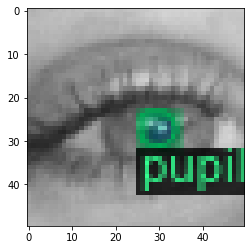

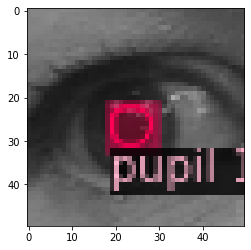

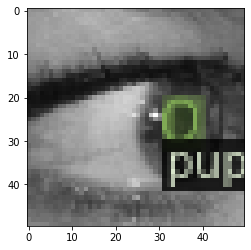

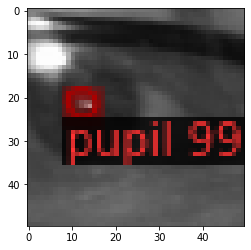

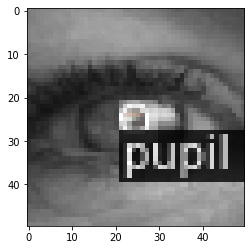

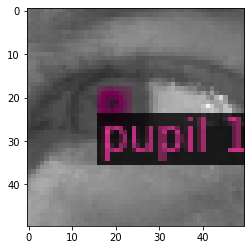

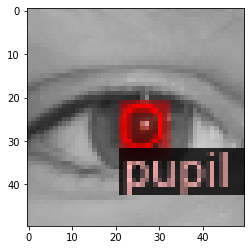

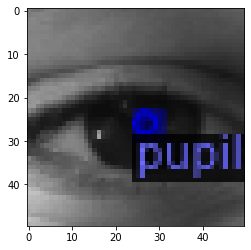

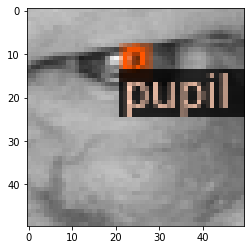

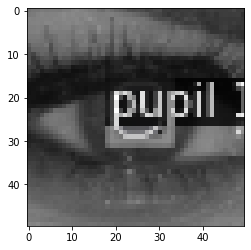

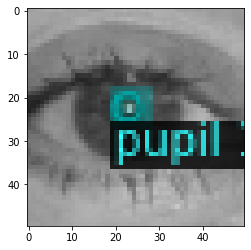

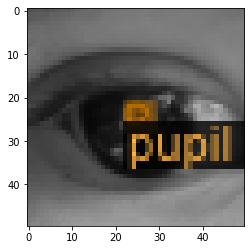

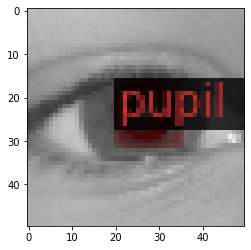

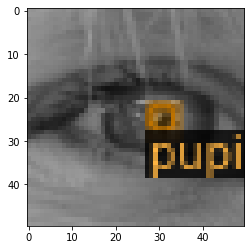

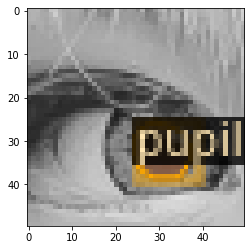

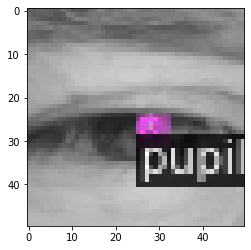

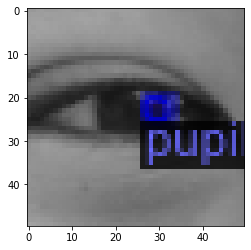

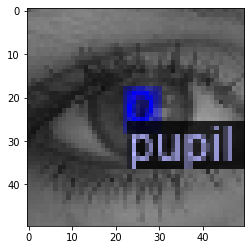

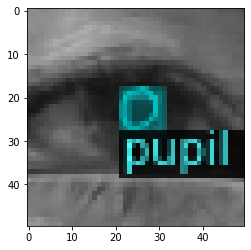

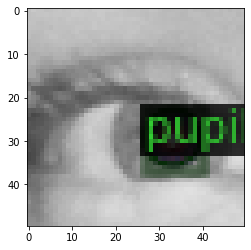

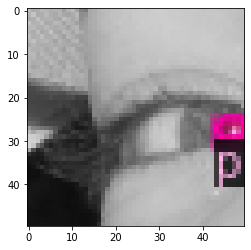

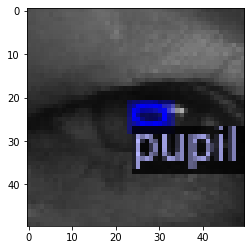

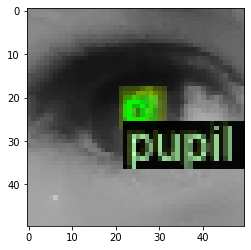

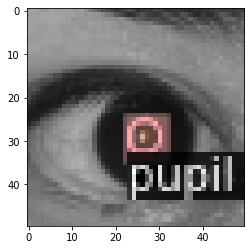

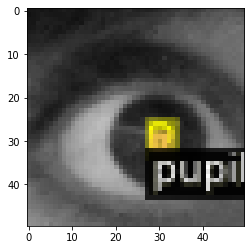

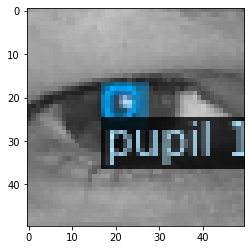

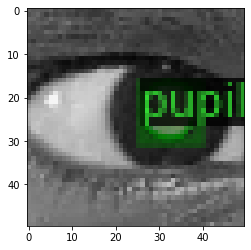

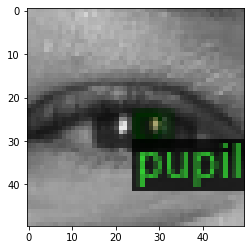

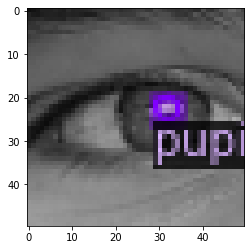

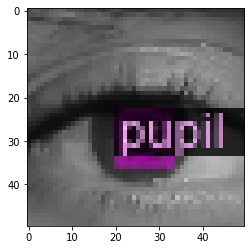

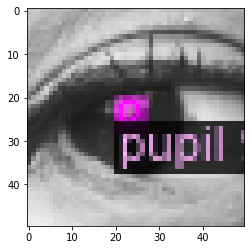

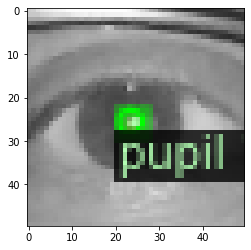

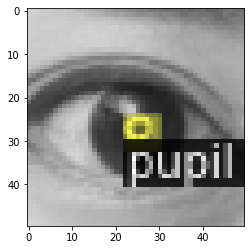

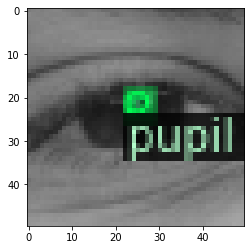

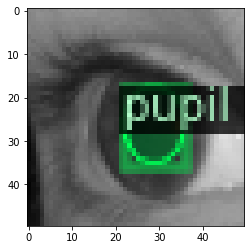

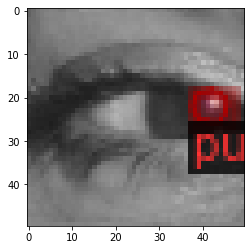

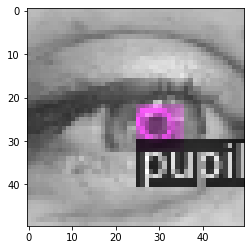

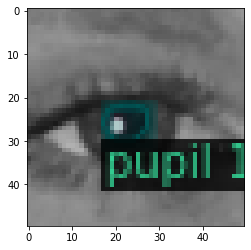

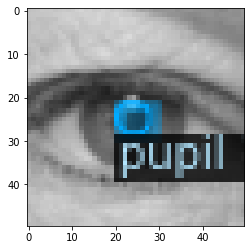

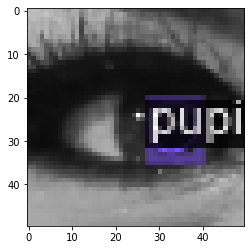

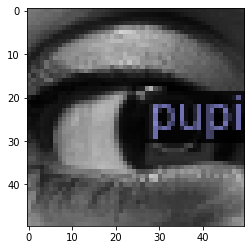

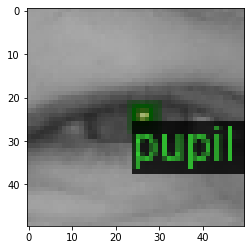

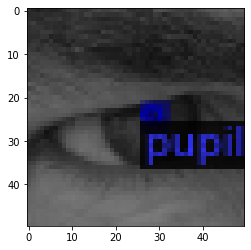

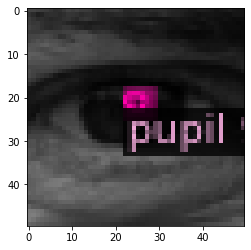

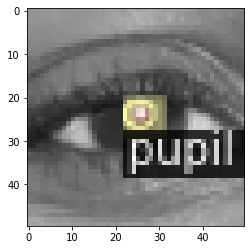

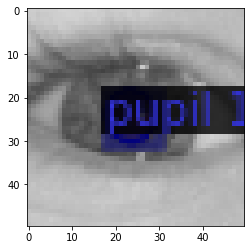

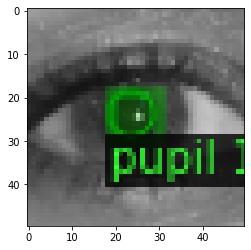

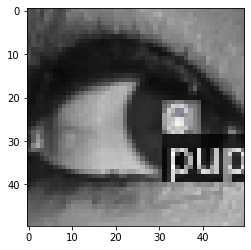

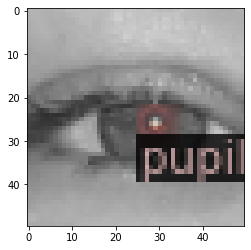

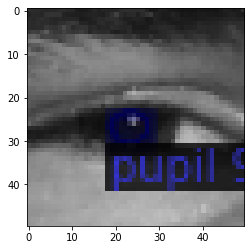

In [18]:
from detectron2.utils.visualizer import ColorMode
#dataset_dicts = get_balloon_dicts("balloon/val")
for i in dataset_dicts:
    im = cv2.imread(i["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=aaatest, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure()
    plt.imshow(out.get_image()[:, :, ::-1])

In [24]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[01/07 11:25:55 d2.data.datasets.coco]: Loaded 50 images in COCO format from val.json
[01/07 11:25:55 d2.data.common]: Serializing 50 elements to byte tensors and concatenating them all ...
[01/07 11:25:55 d2.data.common]: Serialized dataset takes 0.02 MiB
[01/07 11:25:55 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/07 11:25:55 d2.evaluation.evaluator]: Start inference on 50 images
[01/07 11:25:57 d2.evaluation.evaluator]: Inference done 11/50. 0.1824 s / img. ETA=0:00:07
[01/07 11:26:02 d2.evaluation.evaluator]: Inference done 39/50. 0.1783 s / img. ETA=0:00:01
[01/07 11:26:04 d2.evaluation.evaluator]: Total inference time: 0:00:08.121652 (0.180481 s / img per device, on 1 devices)
[01/07 11:26:04 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:08 (0.178415 s / img per device, on 1 devices)
[01/07 11:26:04 d2.evaluation.coco_evaluation]: Preparing results for COCO

/home/finch/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


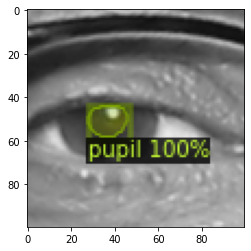

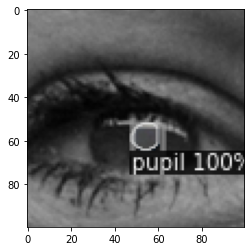

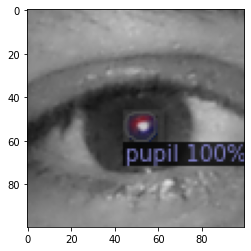

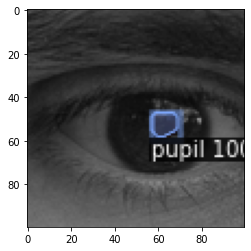

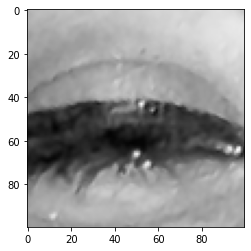

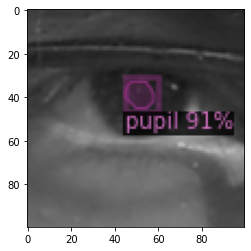

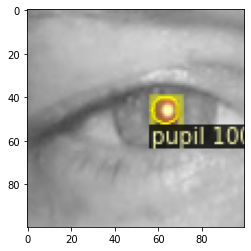

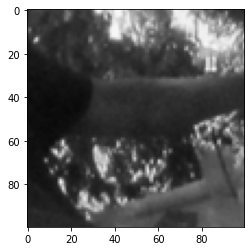

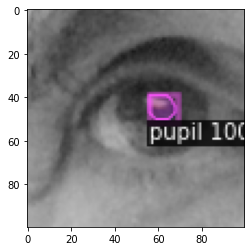

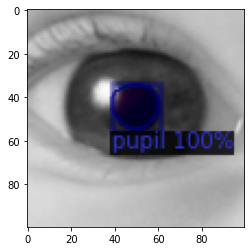

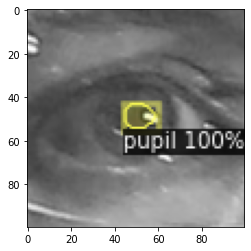

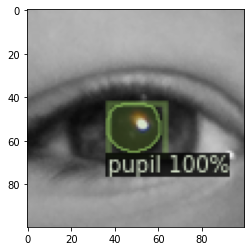

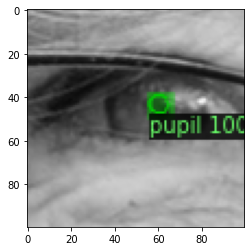

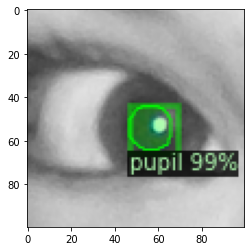

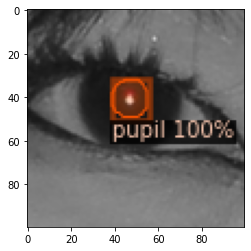

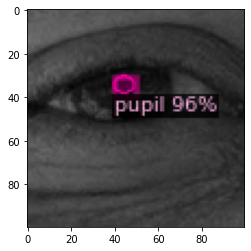

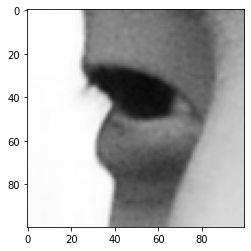

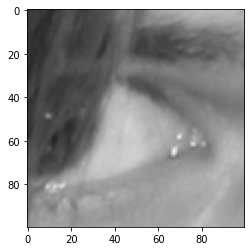

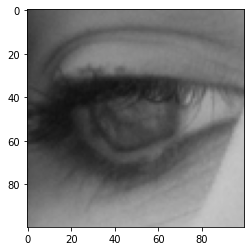

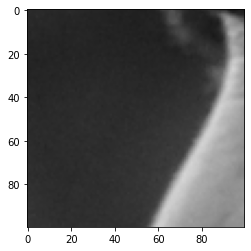

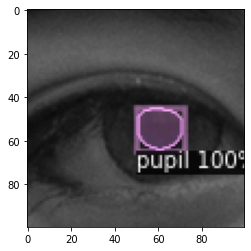

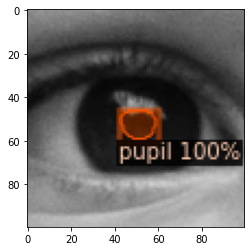

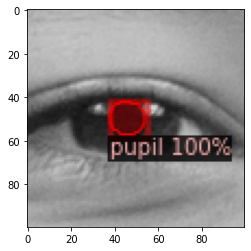

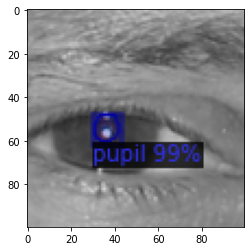

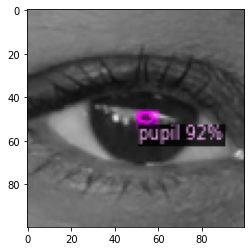

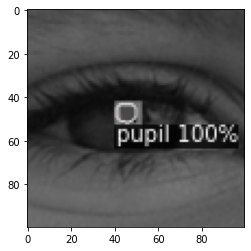

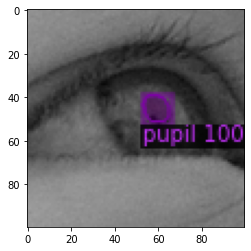

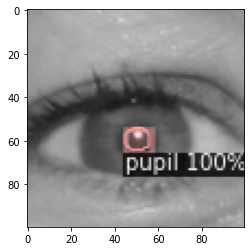

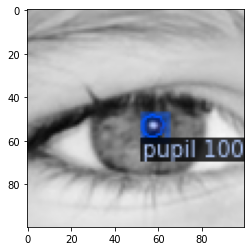

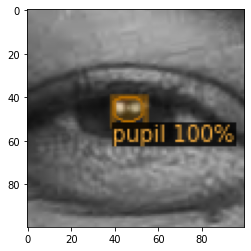

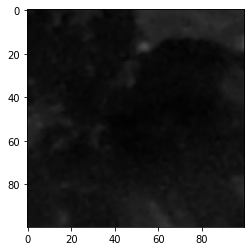

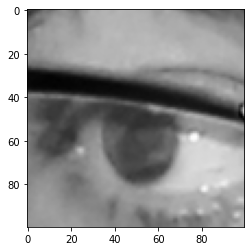

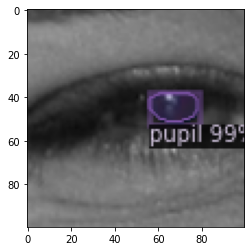

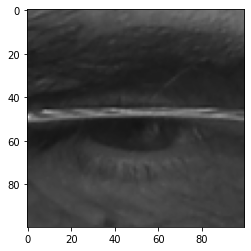

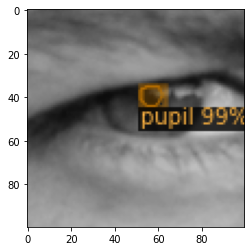

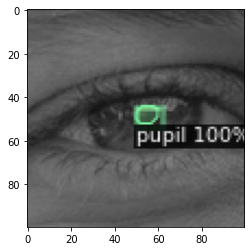

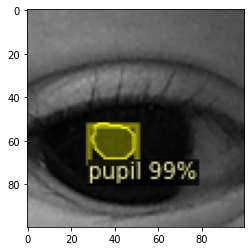

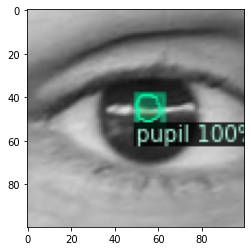

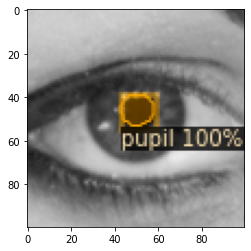

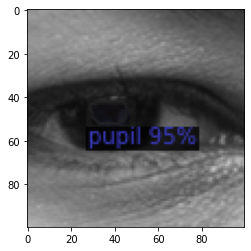

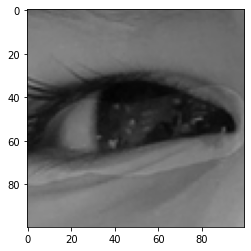

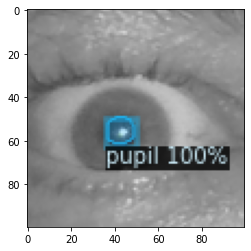

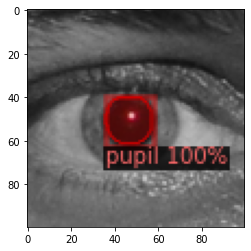

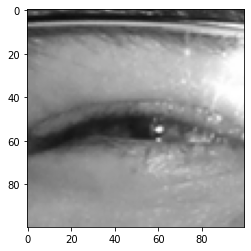

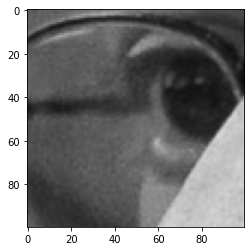

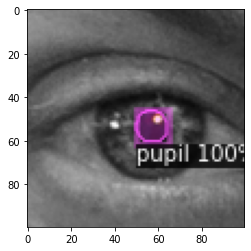

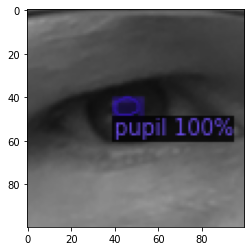

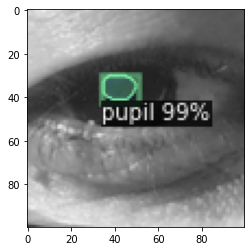

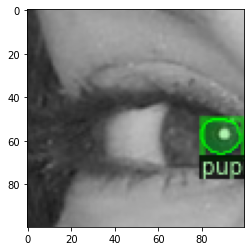

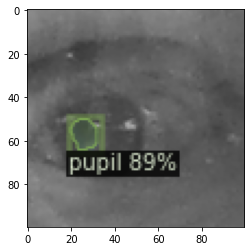

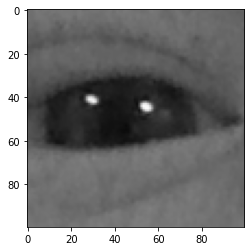

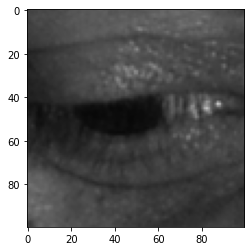

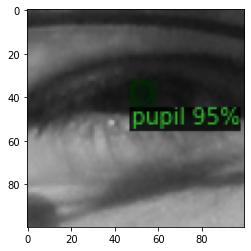

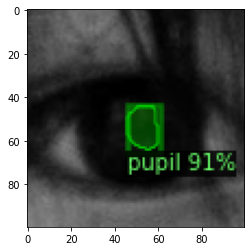

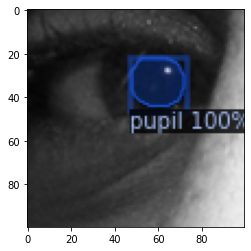

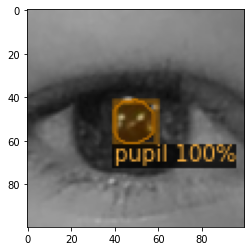

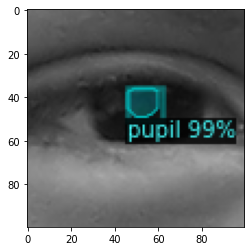

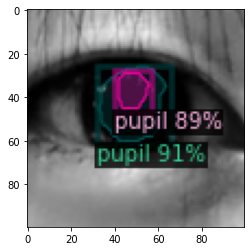

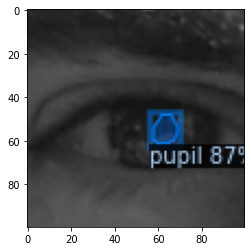

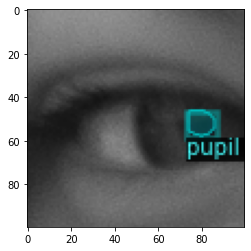

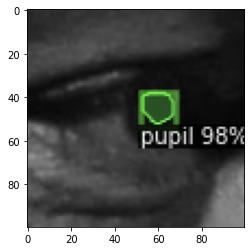

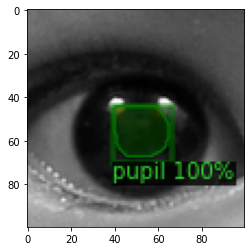

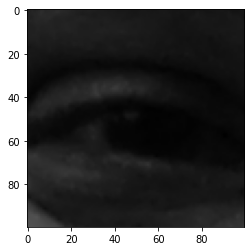

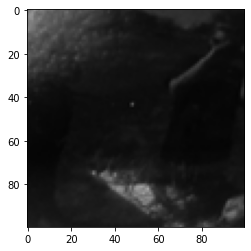

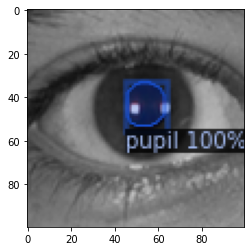

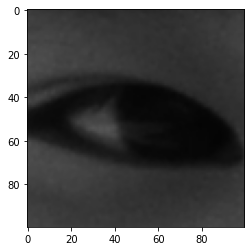

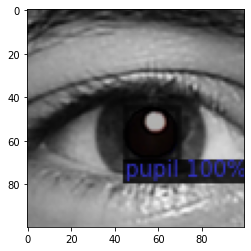

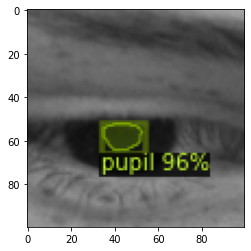

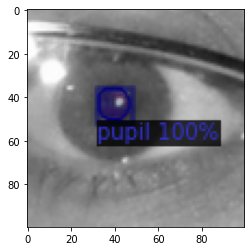

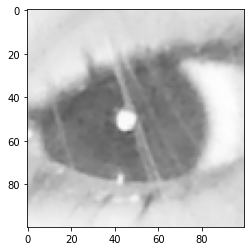

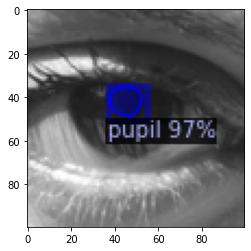

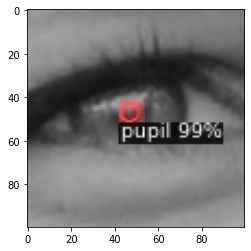

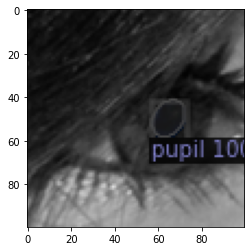

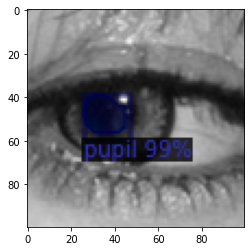

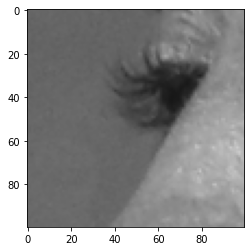

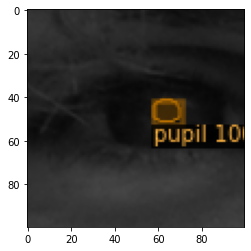

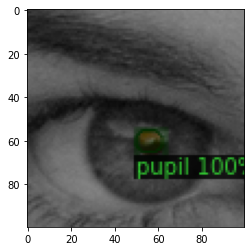

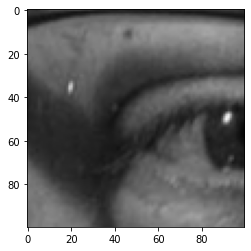

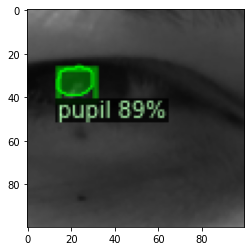

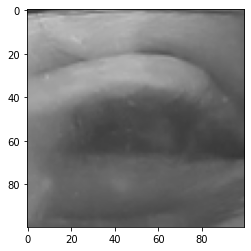

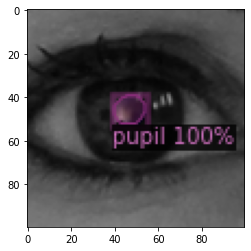

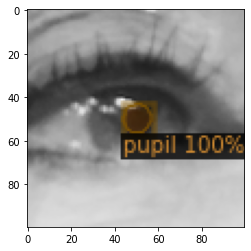

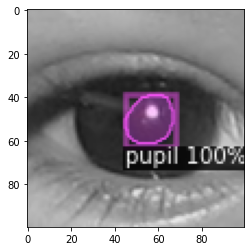

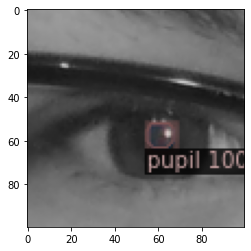

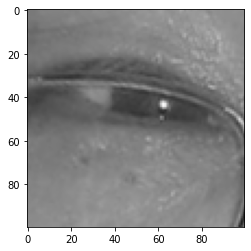

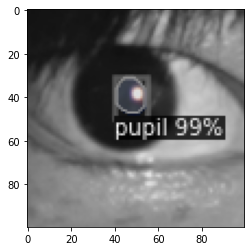

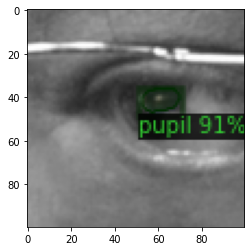

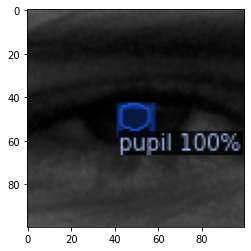

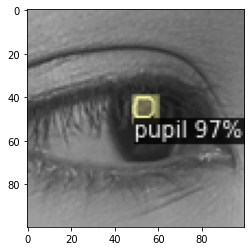

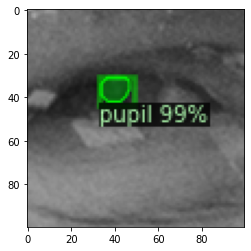

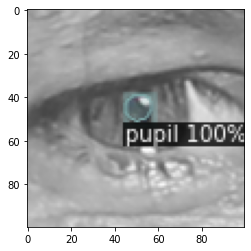

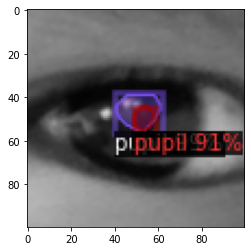

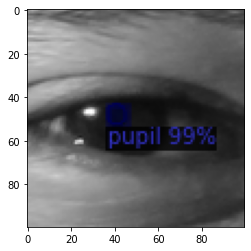

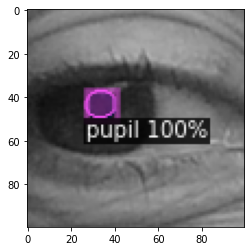

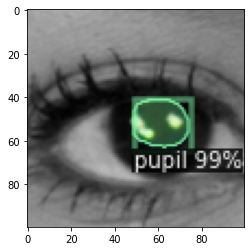

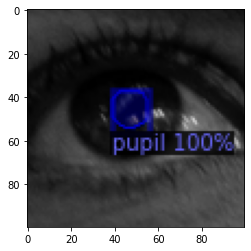

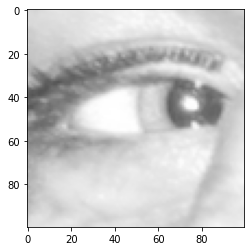

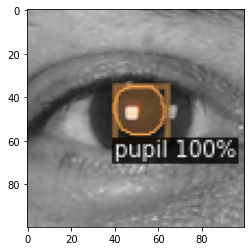

In [22]:
folder = "first20/"
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    outputs = predictor(img)
    #v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = Visualizer(img[:, :, ::-1],
                   MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW)

    #out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure()
    plt.imshow(out.get_image()[:, :, ::-1])
    cv2.imwrite("prediction_images/"+filename, out.get_image()[:, :, ::-1])